In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

from warnings import filterwarnings
filterwarnings('ignore')    

In [2]:
data = pd.read_csv("loan-status-data.csv", delimiter=";")
print(data.head(5))

                                Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

  Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0  Fully Paid               445412  Short Term         709.0      1167493.0   
1  Fully Paid               262328  Short Term           NaN            NaN   
2  Fully Paid             99999999  Short Term         741.0      2231892.0   
3  Fully Paid               347666   Long Term         721.0       806949.0   
4  Fully Paid               176220  Short Term           NaN            NaN   

  Years in current job Home Ownership 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       65535 non-null  object 
 1   Customer ID                   65535 non-null  object 
 2   Loan Status                   65535 non-null  object 
 3   Current Loan Amount           65535 non-null  int64  
 4   Term                          65535 non-null  object 
 5   Credit Score                  52968 non-null  float64
 6   Annual Income                 52968 non-null  float64
 7   Years in current job          62780 non-null  object 
 8   Home Ownership                65535 non-null  object 
 9   Purpose                       65535 non-null  object 
 10  Monthly Debt                  65535 non-null  object 
 11  Years of Credit History       65535 non-null  object 
 12  Months since last delinquent  30596 non-null  float64
 13  N

In [4]:
loan_status = data['Loan Status'].value_counts()
fully_paid = loan_status[0]
charged_off = loan_status[1]

print("Fully Paid: ", fully_paid)
print("Charged Off: ", charged_off)

Fully Paid:  50738
Charged Off:  14797


With missing values: 
Fully paid: 77.42%
Charged off: 22.58%


'\nIkke sikker på hvorfor I kalder det missing values her. "Fully paid" + "Charged off" giver 100% af dataen.\n'

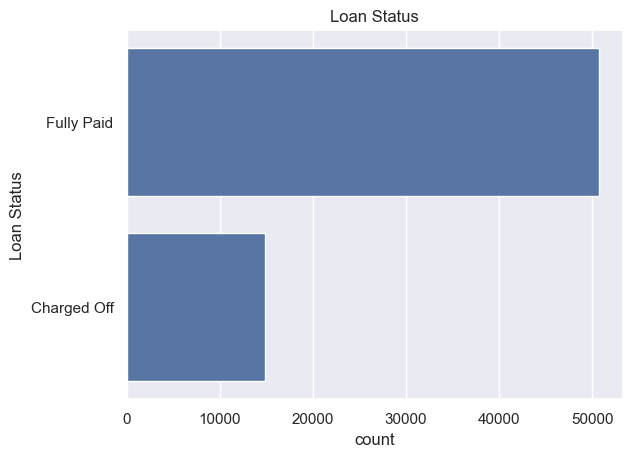

In [5]:
sns.countplot(data['Loan Status'], label='Count')
plt.title('Loan Status')   

print("With missing values: ")
print(f'Fully paid: {round(fully_paid/len(data)*100,2)}%')
print(f'Charged off: {round(charged_off/len(data)*100,2)}%')


'''
Ikke sikker på hvorfor I kalder det missing values her. "Fully paid" + "Charged off" giver 100% af dataen.
'''

# Data preperation and cleaning

## Convert categorical values to numerical values

In [6]:
data.head(1)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.feb,NaN,6,1,228190,416746.0,1.0,0.0


In [7]:
#converting categorical data to numerical

data['Loan Status'] = data['Loan Status'].replace({'Fully Paid': 0, 'Charged Off': 1})

data['Term'] = data['Term'].replace({'Short Term': 0, 'Long Term': 1})

data['Home Ownership'] = data['Home Ownership'].replace({'Home Mortgage': 0, 'Rent': 1, 'Own Home': 2, 'HaveMortgage': 3})

data['Purpose'] = data['Purpose'].replace({'Debt Consolidation': 0, 'other': 1, 'Home Improvements': 2, 'Other': 3, 'Business Loan': 4, 
                                            'Buy a Car': 5, 'Medical Bills': 6, 'Buy House': 7, 'Take a Trip': 8, 'Educational Expenses': 9, 
                                            'moving': 10, 'wedding': 11, 'vacation': 12, 'major_purchase': 13, 'small_business': 14, 
                                            'renewable_energy': 15, 'moving': 16, 'wedding': 17, 'vacation': 18, 'major_purchase': 19, 
                                            'small_business': 20, 'renewable_energy': 21})





In [8]:
list(data.columns)

['Loan ID',
 'Customer ID',
 'Loan Status',
 'Current Loan Amount',
 'Term',
 'Credit Score',
 'Annual Income',
 'Years in current job',
 'Home Ownership',
 'Purpose',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens']

## Removing missing values

In [9]:
print('Missing values:')
data.isnull().sum()

Missing values:


Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    12567
Annual Income                   12567
Years in current job             2755
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    34939
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 1
Bankruptcies                      121
Tax Liens                           9
dtype: int64

In [10]:
#drop missing values 
data = data.dropna()
data.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [11]:
loan_status = data['Loan Status'].value_counts()

fully_paid = loan_status[0]
charged_off = loan_status[1]

print("Fully Paid: ", fully_paid)
print("Charged Off: ", charged_off)

Fully Paid:  18921
Charged Off:  4855


In [12]:
# sns.countplot(data['Loan Status'], label='Count')
# plt.title('Loan Status')   

# print("With missing values: ")
# print(f'Fully paid: {round(fully_paid/len(data)*100,2)}%')
# print(f'Charged off: {round(charged_off/len(data)*100,2)}%')

## Remove outliers

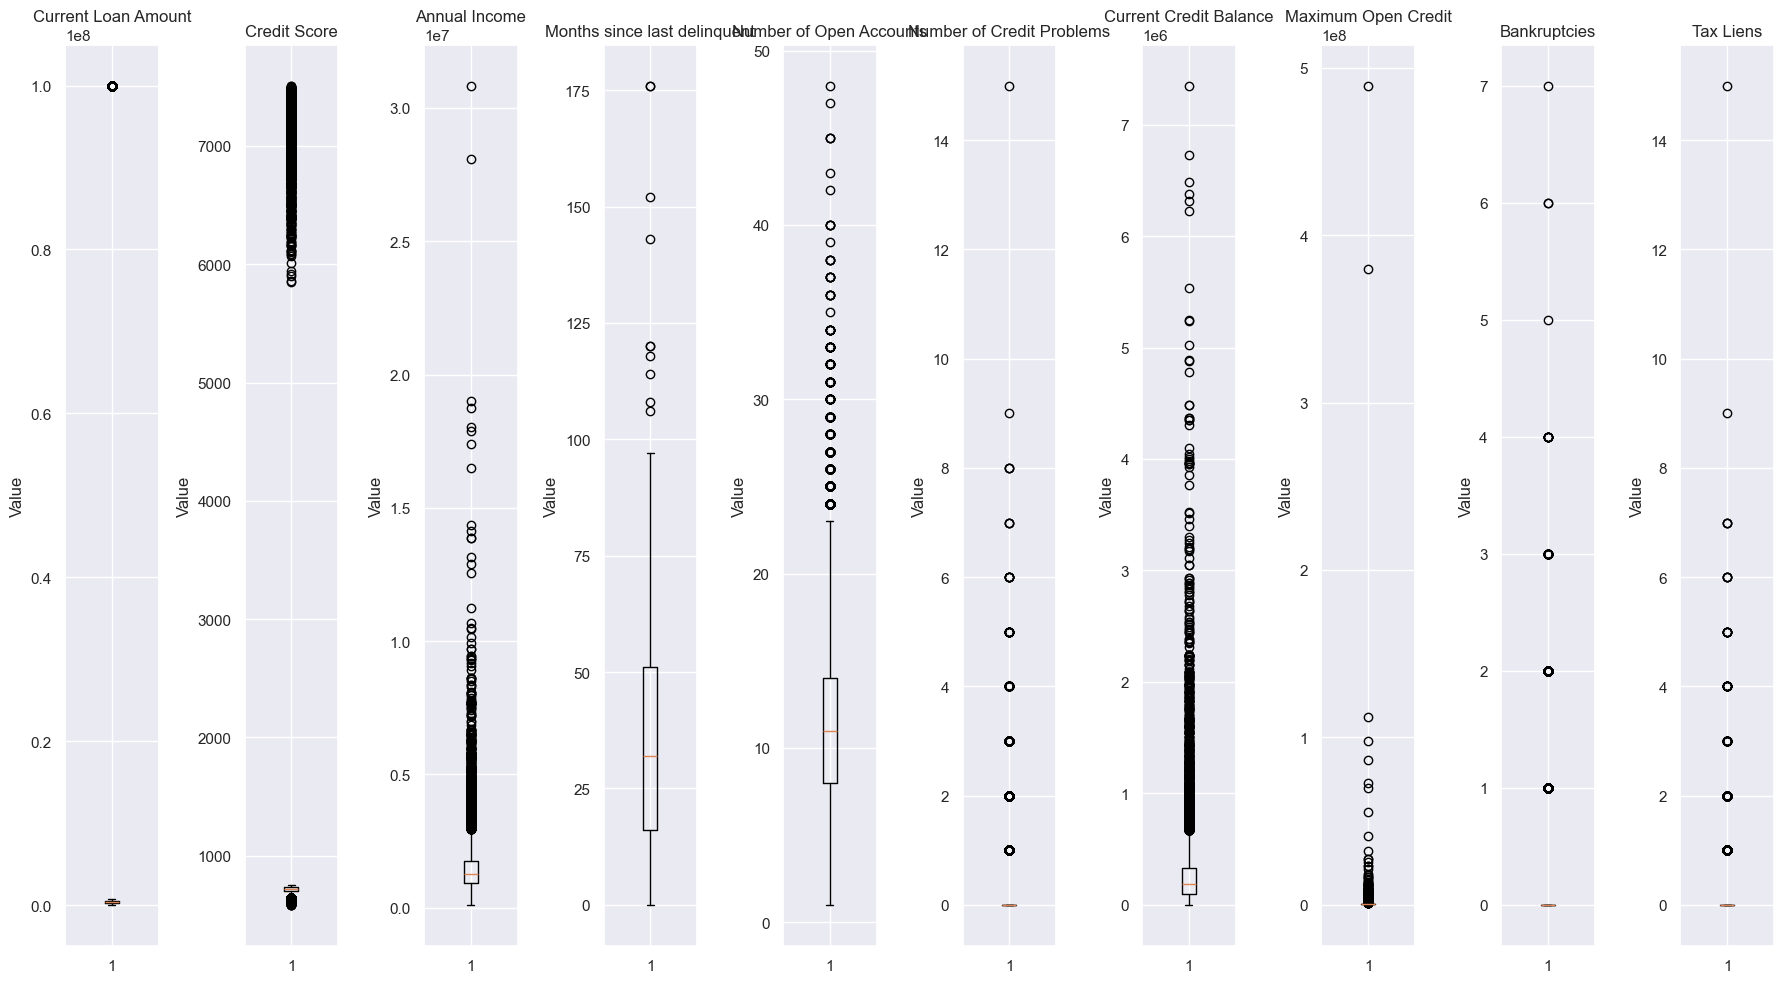

In [13]:
# Create a box plot to visualize outliers
data_box = data.drop(['Loan Status', 'Term', 'Home Ownership', 'Purpose'],axis=1)

numeric_data = data_box.select_dtypes(include=['number'])

# Figure size
plt.figure(figsize=(18, 10))

# Box plot based on the numeric variables
for i, column in enumerate(numeric_data.columns):
    plt.subplot(1, len(numeric_data.columns), i + 1)
    plt.boxplot(numeric_data[column])
    plt.title(column)
    plt.ylabel('Value')

# Layout
plt.tight_layout()

# Show the box plots
plt.show()

In [14]:
#Removing loan amount outliers (people who have taken a loan of more than 99.999.999)
pd.set_option('display.float_format', '{:.0f}'.format)
print(data["Current Loan Amount"].describe()["max"])

data = data[data["Current Loan Amount"] < 99999999]

print(data["Current Loan Amount"].describe()["max"])



99999999.0
789250.0


In [15]:
data[data["Annual Income"] > 5000000]["Annual Income"].count()

#Removing annual income outliers (people who have an annual income of more than 5.000.000)

data = data[data["Annual Income"] < 5000000]

In [16]:
#Removing a single outlier in credit problems (people who have more than 15 credit problems)
data["Number of Credit Problems"].value_counts()
data = data[data["Number of Credit Problems"] < 15]


In [17]:
data = data[data["Tax Liens"] < 9]
data["Tax Liens"].value_counts()

Tax Liens
0    19913
1      349
2       90
3       23
4       12
5        6
6        3
7        3
Name: count, dtype: int64

In [55]:
data[data["Maximum Open Credit"] > 10000000]["Maximum Open Credit"].count()

20

In [56]:
data = data[data["Maximum Open Credit"]< 10000000]

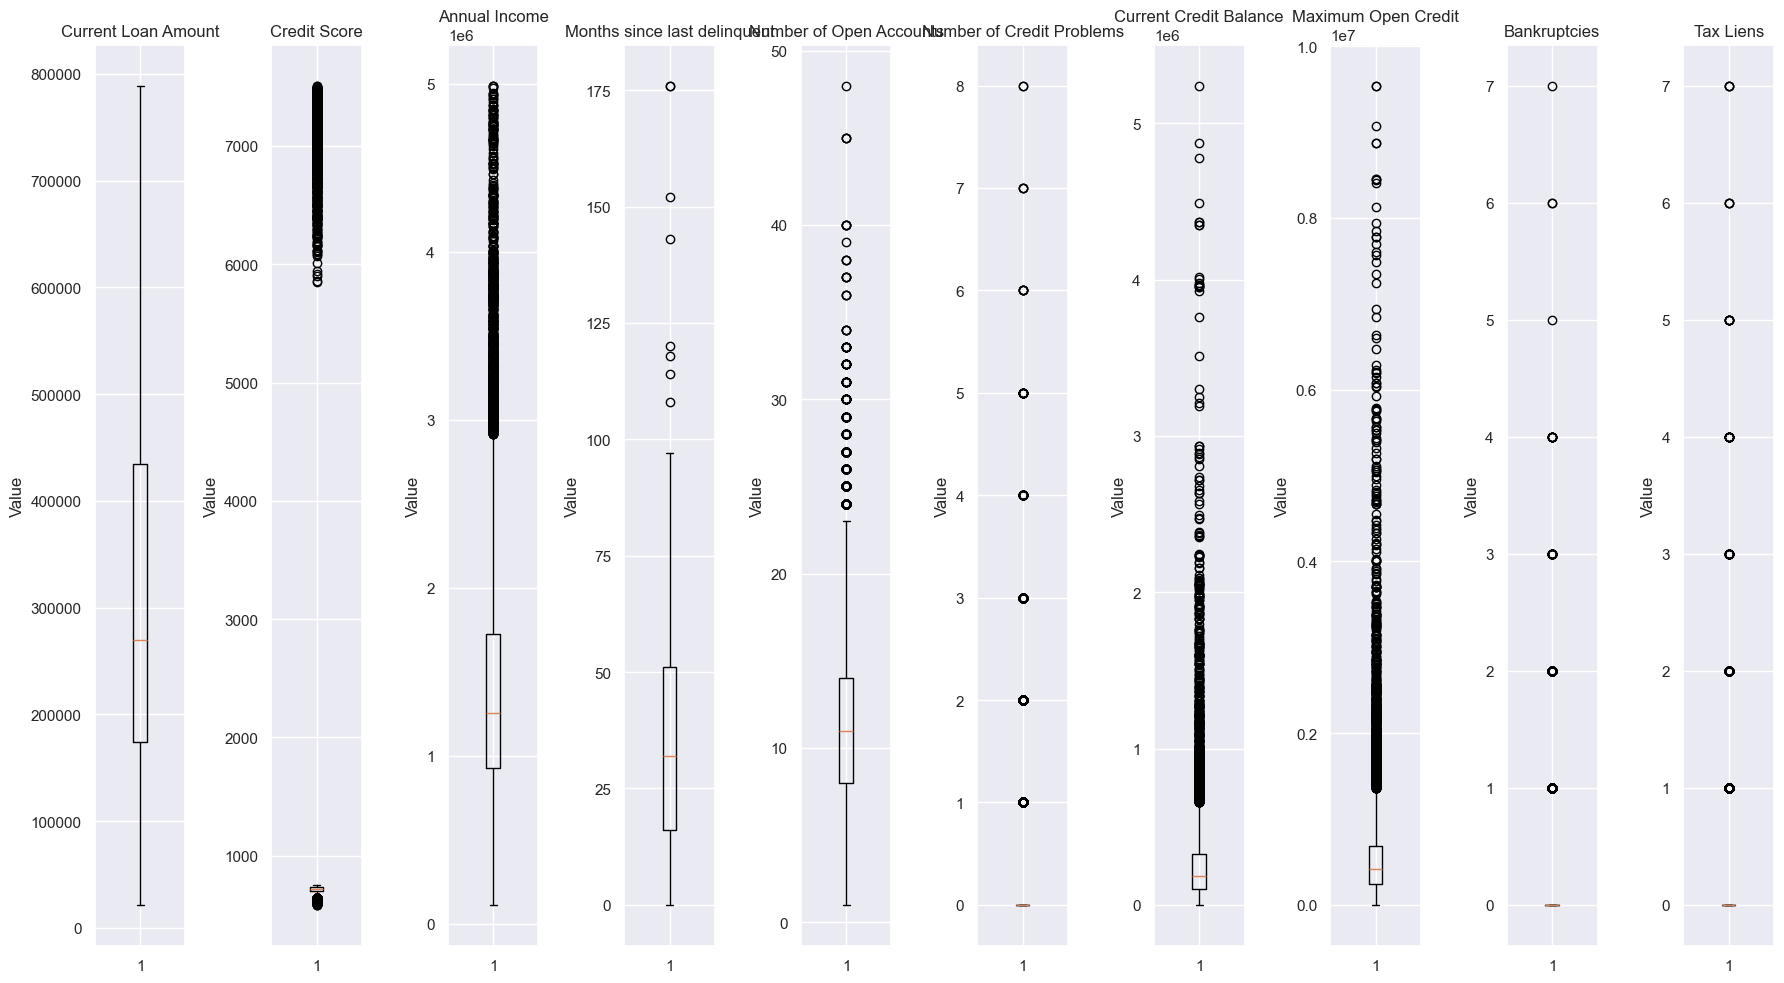

In [57]:
data_box = data.drop(['Loan Status', 'Term', 'Home Ownership', 'Purpose'],axis=1)

numeric_data = data_box.select_dtypes(include=['number'])

# Figure size
plt.figure(figsize=(18, 10))

# Box plot based on the numeric variables
for i, column in enumerate(numeric_data.columns):
    plt.subplot(1, len(numeric_data.columns), i + 1)
    plt.boxplot(numeric_data[column])
    plt.title(column)
    plt.ylabel('Value')

# Layout
plt.tight_layout()

# Show the box plots
plt.show()

In [60]:
data.to_csv("cleaned_data.csv")